In [1]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

In [2]:
eps_over_kB = 119.8 # K
sigma = 3.405 # Angstroms
N = 256
T = 83.8 # K
V = 28.24 # cm^3 / mol

In [3]:
T_star = T / eps_over_kB

rho_star = 1/( (V/constants.N_A) / (1e-8 * sigma)**3)

print("T* = {}".format(T_star))
print("rho* = {}".format(rho_star))

T* = 0.6994991652754591
rho* = 0.8418555100477527


# Equilibration

In [4]:
equ_data = np.loadtxt("equilibration/eq_log.txt")

Text(0, 0.5, 'Acceptance Rate')

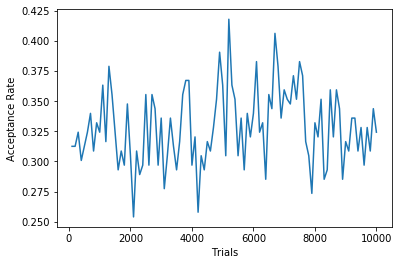

In [5]:
plt.plot(equ_data[:,0], equ_data[:,1])
plt.xlabel("Trials")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, '$p\\sigma^3$/$\\epsilon$')

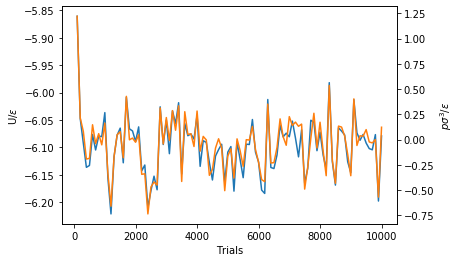

In [6]:
plt.plot(equ_data[:,0], equ_data[:,2])
plt.xlabel("Trials")
plt.ylabel("U/$\\epsilon$")
plt.twinx()
plt.plot(equ_data[:,0], equ_data[:,3], color='C1')
plt.xlabel("Trials")
plt.ylabel("$p\\sigma^3$/$\\epsilon$")

# Production

In [7]:
prod_data = np.loadtxt("production/prod_log.txt")

Text(0, 0.5, 'Acceptance Rate')

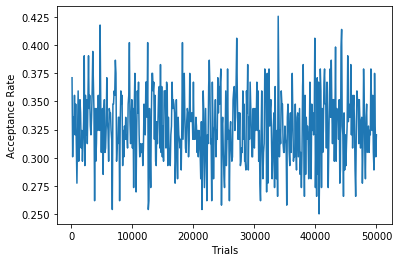

In [8]:
plt.plot(prod_data[:,0], prod_data[:,1])
plt.xlabel("Trials")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'U/$\\epsilon$')

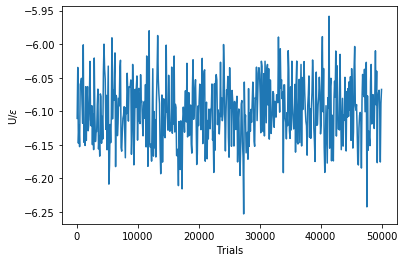

In [9]:
plt.plot(prod_data[:,0], prod_data[:,2])
plt.xlabel("Trials")
plt.ylabel("U/$\\epsilon$")

Text(0, 0.5, '$p\\sigma^3$/$\\epsilon$')

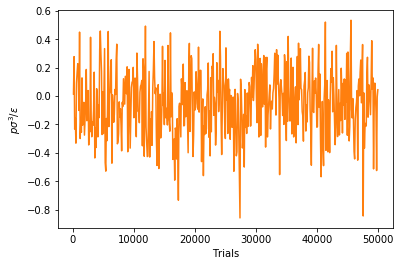

In [10]:
plt.plot(prod_data[:,0], prod_data[:,3], color='C1')
plt.xlabel("Trials")
plt.ylabel("$p\\sigma^3$/$\\epsilon$")

In [11]:
avg_U_star = np.average(prod_data[:,2])
avg_U = avg_U_star * eps_over_kB * constants.k * constants.N_A / 1000

print("<U*> = {}".format(avg_U_star))
print("<U> = {}".format(avg_U))

std_U_star = np.std(prod_data[:,2])
std_U = std_U_star * eps_over_kB * constants.k * constants.N_A / 1000

print("std(U*) = {}".format(std_U_star))
print("std(U) = {} kJ/mol".format(std_U))

<U*> = -6.09902542
<U> = -6.075072239638414
std(U*) = 0.04691370208397115
std(U) = 0.04672945422631144 kJ/mol


In [12]:
avg_p_star = np.average(prod_data[:,3])
avg_p = avg_p_star * eps_over_kB * constants.k /( 1e-10*sigma)**3 / 1e5

print("<p*> = {}".format(avg_p_star))
print("<p> = {} bar".format(avg_p))

std_p_star = np.std(prod_data[:,3])
std_p = std_p_star * eps_over_kB * constants.k /( 1e-10*sigma)**3 / 1e5

print("std(p*) = {}".format(std_p_star))
print("std(p) = {} bar".format(std_p))

<p*> = -0.051067115588000006
<p> = -21.395876399386072 bar
std(p*) = 0.23371999630175552
std(p) = 97.92298028503508 bar


In [16]:
C_V_star = np.var(prod_data[:, 2] * N) / T_star**2 / N
C_V = C_V_star * constants.k*constants.N_A
print("C_V_ex* = {} ".format(C_V_star))
print("C_V_ex = {} J/(K mol)".format(C_V))
print("\nC_V_id* = {}".format(1.5))
print("C_V_id = {} J/(K mol)".format(1.5*constants.k*constants.N_A))

print("\nC_V_id* + C_V_ex* = {} ".format(1.5 + C_V_star))
print("C_V_id + C_V_ex = {} J/(K mol)".format((1.5 + C_V_star) *constants.k*constants.N_A))



C_V_ex* = 1.1515027391992645 
C_V_ex = 9.574126479773344 J/(K mol)

C_V_id* = 1.5
C_V_id = 12.471693927229861 J/(K mol)

C_V_id* + C_V_ex* = 2.6515027391992643 
C_V_id + C_V_ex = 22.045820407003202 J/(K mol)
